**21-03-09 python 12_데이터 프레임과 시리즈(Pandas) (c)cherryuki (ji)**

# <font color="blue">ch12. 데이터 프레임과 시리즈(Pandas)</font>

# 8절. 데이터 그룹화 및 집계

In [2]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris", package="datasets").data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.1 Group by

In [3]:
iris_df.groupby(iris_df.Species).mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [4]:
iris_df.groupby(iris_df.Species)['Sepal.Length', 'Sepal.Width'].mean()

<ipython-input-4-da41f457131c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_df.groupby(iris_df.Species)['Sepal.Length', 'Sepal.Width'].mean()


,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [5]:
iris_df.pivot_table(index="Species", values=["Sepal.Length", "Sepal.Width"]) #기본값: aggfunc='mean'

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [6]:
iris_df.pivot_table(index="Species", values=["Sepal.Length"], aggfunc="sum")

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [7]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [8]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [9]:
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [10]:
iris_df.loc[1, 'Sepal.Length']

4.9

In [12]:
import random
rownum=random.sample(range(len(iris_df)),4)
rownum

[52, 133, 76, 132]

In [16]:
for row in rownum:
    iris_df.loc[row, 'Sepal.Length'] = np.nan #결측치 넣기

In [17]:
iris_df.loc[rownum, 'Sepal.Length']

52    NaN
133   NaN
76    NaN
132   NaN
Name: Sepal.Length, dtype: float64

In [18]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,48,50,50,50
virginica,48,50,50,50


### 다중열로 그룹화

In [19]:
iris_df.groupby([iris_df['Species'], iris_df['Sepal.Length']]).describe().head()

Sepal.Width                                             \
                           count      mean       std  min    25%  50%   75%   
Species Sepal.Length                                                          
setosa  4.3                  1.0  3.000000       NaN  3.0  3.000  3.0  3.00   
        4.4                  3.0  3.033333  0.152753  2.9  2.950  3.0  3.10   
        4.5                  1.0  2.300000       NaN  2.3  2.300  2.3  2.30   
        4.6                  4.0  3.325000  0.221736  3.1  3.175  3.3  3.45   
        4.7                  2.0  3.200000  0.000000  3.2  3.200  3.2  3.20   

                          Petal.Length            ...             Petal.Width  \
                      max        count      mean  ...    75%  max       count   
Species Sepal.Length                              ...                           
setosa  4.3           3.0          1.0  1.100000  ...  1.100  1.1         1.0   
        4.4           3.2          3.0  1.333333  ...  1.350  1.4         3.0   
        4.5           2.3          1.0  1.300000  ...  1.300  1.3         1.0   
        4.6           3.6          4.0  1.325000  ...  1.425  1.5         4.0   
        4.7           3.2          2.0  1.450000  ...  1.525  1.6         2.0   

                                                                      
                       mean           std  min  25%  50%    75%  max  
Species Sepal.Length                                                  
setosa  4.3           0.100           NaN  0.1  0.1  0.1  0.100  0.1  
        4.4           0.200  3.399350e-17  0.2  0.2  0.2  0.200  0.2  
        4.5           0.300           NaN  0.3  0.3  0.3  0.300  0.3  
        4.6           0.225  5.000000e-02  0.2  0.2  0.2  0.225  0.3  
        4.7           0.200  0.000000e+00  0.2  0.2  0.2  0.200  0.2  

[5 rows x 24 columns]

In [20]:
g = iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006000,3.428,1.462,0.246
versicolor,5.897917,2.770,4.260,1.326
virginica,6.597917,2.974,5.552,2.026


<AxesSubplot:xlabel='Species'>

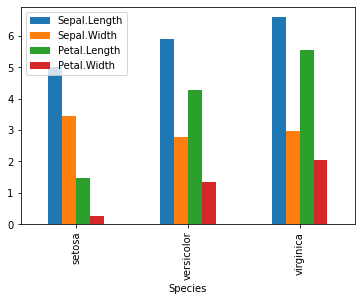

In [21]:
iris_df.groupby(iris_df.Species).mean().plot(kind="bar")

[]

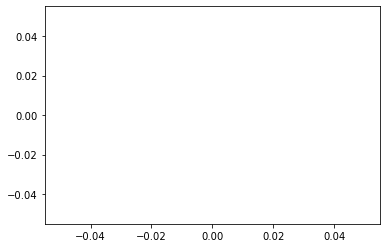

In [22]:
import matplotlib.pyplot as plt
plt.plot() #shift_Tab 눌러서 도움말 확인

- 그래프 양식 참고: https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

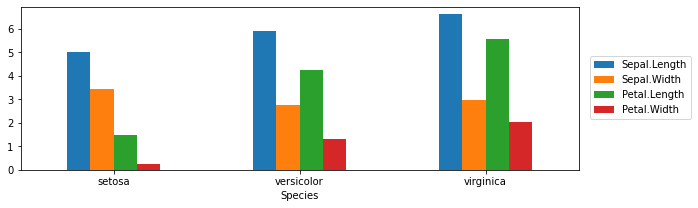

In [23]:
import matplotlib.pyplot as plt
g.plot(kind="bar", rot=0, figsize=(10,3))
plt.legend(bbox_to_anchor=(1.02, 0.7), loc=2, borderaxespad=0.) #범례 위치 조정(그래프 밖으로)

In [26]:
iris_df.groupby(iris_df.Species).describe().transpose()
iris_df.groupby(iris_df.Species).describe().T #전치행렬 .T로도 가능(transpose()와 같은 효과)

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   48.000000  48.000000
             mean    5.006000    5.897917   6.597917
             std     0.352490    0.490544   0.647249
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.200000
             50%     5.000000    5.850000   6.500000
             75%     5.200000    6.225000   6.950000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [27]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.283333     2.957143      4.500000
           1.5              6.111111     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.000000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              7.100000     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [28]:
g.unstack() #끝에 있는 인덱스 Petal.Width가 컬럼값으로 이동

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [29]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

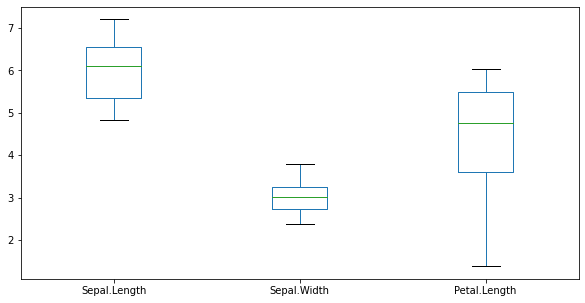

In [30]:
g.plot.box(figsize=(10,5))

In [31]:
g = iris_df.groupby([iris_df['Species'], iris_df['Petal.Width']])['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.283333
            1.5            6.111111
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.000000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            7.100000
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [32]:
type(g) #Series

pandas.core.series.Series

In [33]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,7.1,6.9125,6.266667,6.733333


In [34]:
import pandas as pd
pd.options.display.max_columns

20

In [35]:
pd.options.display.max_columns = 22

In [36]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.283333,6.111111,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.000000,7.2,4.9,6.445455,6.34,6.65,6.916667,7.1,6.9125,6.266667,6.733333


In [37]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터(반복문 처리)

In [38]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [39]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,"번째 그룹은",species_name)
    print(type(group))
    print("----------------------------------------")

0 번째 그룹은 setosa
<class 'pandas.core.frame.DataFrame'>
----------------------------------------
1 번째 그룹은 versicolor
<class 'pandas.core.frame.DataFrame'>
----------------------------------------
2 번째 그룹은 virginica
<class 'pandas.core.frame.DataFrame'>
----------------------------------------


In [40]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ', species_name)
    print(group.sample(5).sort_index())
    print("----------------------------------------")

0 번째 그룹은  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
17           5.1          3.5           1.4          0.3  setosa
24           4.8          3.4           1.9          0.2  setosa
26           5.0          3.4           1.6          0.4  setosa
30           4.8          3.1           1.6          0.2  setosa
49           5.0          3.3           1.4          0.2  setosa
----------------------------------------
1 번째 그룹은  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
59           5.2          2.7           3.9          1.4  versicolor
67           5.8          2.7           4.1          1.0  versicolor
68           6.2          2.2           4.5          1.5  versicolor
93           5.0          2.3           3.3          1.0  versicolor
94           5.6          2.7           4.2          1.3  versicolor
----------------------------------------
2 번째 그룹은  virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Widt

In [41]:
for group, item in iris_group:
    print(group, "그룹")
    print(item.head())
    print("----------------------------------------")

setosa 그룹
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
----------------------------------------
versicolor 그룹
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           NaN          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
----------------------------------------
virginica 그룹
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
100           

## 8.3 데이터 프레임 그룹 인덱싱

In [42]:
for group, item in iris_group:
    print(group, '그룹')
    print(item.iloc[[1,11,21]]) #각 종별 1,11,21번째
    print("----------------------------------------")

setosa 그룹
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1            4.9          3.0           1.4          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
21           5.1          3.7           1.5          0.4  setosa
----------------------------------------
versicolor 그룹
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
51           6.4          3.2           4.5          1.5  versicolor
61           5.9          3.0           4.2          1.5  versicolor
71           6.1          2.8           4.0          1.3  versicolor
----------------------------------------
virginica 그룹
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
101           5.8          2.7           5.1          1.9  virginica
111           6.4          2.7           5.3          1.9  virginica
121           5.6          2.8           4.9          2.0  virginica
----------------------------------------


In [44]:
#각 종별 1,11,21번째
t = iris_df.groupby(iris_df.Species).take([1,11,21])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             4.9          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0

In [45]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4


## 8.4 레이블(원핫 인코딩)

In [46]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris_df.Species.describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [48]:
#레이블을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절. 데이터 구조 변경
## 9.1 와이드 포맷과 롱 포맷
- 판다스 공식 문서에 나오는 melt: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- Tidy Data란? : https://vita.had.co.nz/papers/tidy-data.pdf (7페이지)

In [49]:
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset('airquality', package='datasets') #package 생략시 datasets(기본값)
airquality = airquality_data.data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt()를 이용한 언피벗팅

In [50]:
#열이름(Ozone, Solar.R, Wind, Temp)를 melt로 데이터로 넣을 예정
airquality.melt(id_vars=('Month','Day'))  #airquality 데이터가 변하는 것X

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [51]:
airquality.sample()

,Ozone,Solar.R,Wind,Temp,Month,Day
110,31.0,244.0,10.9,78,8,19


In [52]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [53]:
airquality.melt(id_vars=['Month','Day'], var_name='변수', value_name='값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [54]:
airquality_melted_sort = airquality_melted.sort_values(by=["Month","Day"]) #롱 포맷(long format)
airquality_melted_sort.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [55]:
airquality.head() #와이드 포맷(wide format)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [56]:
import pandas as pd
airquality.melt(id_vars=['Month','Day'])
#pd.melt(airquality, id_vars=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## 9.3 pivot_table()을 이용한 피벗팅(롱형 -> 와이드형)

In [57]:
#멜트된 데이터 프레임: airquality_melted, airquality_melted_sort
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                                           columns=['variable'],
                                           values=['value']) #aggfunc='mean'
airquality2

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [58]:
airquality2.loc[5].head()

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [59]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [60]:
airquality2.columns #(level0, levle1)

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [63]:
airquality2.columns = airquality2.columns.droplevel(level=0) #level=0 없애기
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [64]:
#airquality_melted_sort 데이터 프레임을 와이드형으로 피벗팅
airquality3 = airquality_melted_sort.pivot_table(index=['Month','Day'],
                                                columns=['variable'],
                                                values=['value'])
airquality3

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [65]:
airquality3 = airquality3.reset_index(level=['Month','Day'],
                                     col_level=1)
airquality3

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [67]:
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [68]:
#결측치(NaN) 있어서 airquality2==airquality3 으로 비교 불가 (NaN이 False로 나옴)
import numpy as np
a = np.nan
a

nan

In [70]:
if a==np.nan:
    print("a==nan")
elif a is np.nan:
    print("a is nan")
else:
    print("a is not nan")

a is nan


In [ ]:
#주택도시보증공사_전국 평균 분양가격(2019년 12월).csv을 df_last 변수
#전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv 을 df_first 변수
###df_last랑 df_first를 concat하기(df_first를 df_last를 참조하여 변환해야 함)###
#단, 시간별 평당분양 가격의 추이, 지역별 평단분양 가격의 추이를 분석할 예정
#concat한 데이터 프레임 columns:지역명, 연도월, 평당분양가격

In [71]:
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='CP949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [72]:
df_first=pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='CP949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [73]:
#결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [76]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [77]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [79]:
#pd.to_numeric(member_df['나이'], errors='coerce') #숫자 필드가 문자로 되어 있을 경우
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last.info() #object -> float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


In [80]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [90]:
new_df_last = df_last.loc[df_last['규모구분']=='전체',
                         ['지역명','연도','월','평당분양가격']]
new_df_last.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [98]:
new_df_last['연도월'] = new_df_last['연도'].astype(np.str)+'년'+ new_df_last['월'].astype(np.str)+'월'
new_df_last = new_df_last[['지역명','평당분양가격','연도월']]
new_df_last.head()

,지역명,평당분양가격,연도월
0,서울,19275.3,2015년10월
5,인천,10437.9,2015년10월
10,경기,10355.4,2015년10월
15,부산,10269.6,2015년10월
20,대구,8850.6,2015년10월


In [86]:
#df_first 의 열이름을 행으로 melt하기
df_first_melted = df_first.melt(id_vars=['지역'],
                                var_name='연도월',
                                value_name='평당분양가격')
df_first_melted.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [100]:
df_first_melted.columns = ['지역명','연도월','평당분양가격']
new_df_first = df_first_melted
new_df_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [106]:
result = pd.concat([new_df_first, new_df_last])
result.sample(5).sort_index()

,지역명,연도월,평당분양가격
11,충남,2013년12월,6365.0
57,울산,2014년3월,8153.0
80,전북,2014년4월,6277.0
460,울산,2016년3월,10117.8
2325,대전,2018년1월,9055.2


In [ ]:
# 데이터프레임의 구조를 바꾸는 함수들 : melt, pivot_table(연산O), pivot(연산 X)

In [107]:
year = [2020,2020,2020,2021,2021,2021]
month = [1,2,3]*2
latte=[410,401,402,400,404,405]
americano=[500,483,484,470,486,488]
mocha=[350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, month, latte, americano, mocha],
                    columns=['year','month','latte','americano','mocha'])
sales

,year,month,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [108]:
sales_melted = sales.melt(id_vars=['year','month'],
                         var_name='coffee')
sales_melted.head()

,year,month,coffee,value
0,2020,1,latte,410
1,2020,2,latte,401
2,2020,3,latte,402
3,2021,1,latte,400
4,2021,2,latte,404


In [109]:
sales2 = sales_melted.pivot_table(index=['year','month'],
                                        columns=['coffee'],
                                        values=['value'])
sales2

value            
coffee     americano latte mocha
year month                      
2020 1           500   410   350
     2           483   401   299
     3           484   402   300
2021 1           470   400   301
     2           486   404   302
     3           488   405   300

In [110]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,month,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [111]:
latte_sales.pivot('year','month') #index=year, columns=month

latte          
month     1    2    3
year                 
2020    410  401  402
2021    400  404  405

# 10절. 데이터프레임에 함수적용시키기
## 10.1 apply
- 데이터 프레임이나 시리즈의 각 열 또는 각 행에 함수 적용 가능

In [112]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris').data  #package="datasets" 생략 가능
iris_df.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
28,5.2,3.4,1.4,0.2,setosa


In [113]:
#독립변수
iris_df.iloc[:,:-1].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
x = iris_df.loc[:, 'Sepal.Length':'Petal.Width']
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [115]:
x.apply(np.round).head() #모든 요소에 np.round(반올림) 적용

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0


In [116]:
x.apply(np.sum, axis=0) #열별sum
#X.apply(np.sum, axis=1) #행별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [117]:
#각 데이터와 평균과의 거리를 출력
iris_avg=x.apply(np.average)
iris_avg

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [118]:
x.apply(lambda x:x-iris_avg, axis=1)
x.apply(lambda x:list(x-iris_avg), axis=1) #리스트 형태로 출력(가독성 떨어짐)
#result_type='broadcast'; 출력 타입을 원본데이터(X) 그대로
x.apply(lambda x:list(x-iris_avg), axis=1, result_type='broadcast')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [120]:
new_df_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [121]:
date="2021년3월"
date.split("년")

['2021', '3월']

In [122]:
def parse_year(x):
    return int(x.split("년")[0])
parse_year(date)

2021

In [123]:
def parse_month(x):
    return int(x.split("년")[-1].replace("월",""))
parse_month(date)

3

In [124]:
new_df_first["연도"] = new_df_first["연도월"].apply(lambda x:int(x.split("년")[0]))
new_df_first["월"] = new_df_first["연도월"].apply(lambda x:int(x.split("년")[-1].replace("월","")))
new_df_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


## 10.2 applymap
- apply: 행 또는 열 단위로 함수 적용(데이터프레임이나 시리즈에 적용 가능)
- applymap: 각 요소 하나하나 별로 적용(데이터프레임에서만 가능)

In [126]:
x.apply(np.sum) #열단위로 sum(axis=0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [127]:
#x.applymap(np.sum) #데이터 하나하나에 적용되므로 sum, max, mean 등 의미X
x.applymap(lambda x:x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈타입의 벡터만 가능

In [128]:
new_df_first["연도"] = new_df_first["연도월"].map(lambda x:int(x.split("년")[0]))

In [129]:
x = pd.Series(["공지철",43,"서울특별시"], index=["Name","Age","Address"])
x

Name         공지철
Age           43
Address    서울특별시
dtype: object

In [130]:
def my_func(data):
    return data, len(str(data))
x.map(my_func)

Name         (공지철, 3)
Age           (43, 2)
Address    (서울특별시, 5)
dtype: object

In [131]:
x.map(lambda data:(data, len(str(data))))

Name         (공지철, 3)
Age           (43, 2)
Address    (서울특별시, 5)
dtype: object

In [132]:
#딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈 값이 적용
dic = {"공지철":"공유", 43:45, "마포":"서대문"}
x.map(dic)

Name        공유
Age         45
Address    NaN
dtype: object

In [133]:
s = pd.Series([1,2,3,4,None])

In [134]:
s.map(lambda x:(x,x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [135]:
#연산 적용이 안되는 부분은 건너뛰기(함수 적용X)
s.map(lambda x:(x, x**2), na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절. 일괄 변경하기(결측치나 특정값)
## 11.1 fillna(특정값); 결측치를 특정값으로 변경

In [136]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3,4,np.nan,1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan,3,np.nan,4]],
                columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [137]:
#모든 결측치를 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


- 결측치가 아닌 이전값 또는 바로 다음값으로 채움
 - pad/ffill; 결측치가 아닌 이전값으로 채움
 - backfill/bfill; 결측치가 아닌 다음값으로 채움

In [139]:
df.fillna(method="ffill")

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [140]:
df.fillna(method="bfill")

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [141]:
values = {"A":99, "B":98, "C":97, "D":95} #열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [142]:
df.fillna(value=df.mean())  #모두 결측치인 C컬럼은 결측치 대체가 안 됨

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [143]:
mean = df.mean()
mean

A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

In [144]:
from math import isnan
for idx, value in mean.items():
    if isnan(value):
        mean[idx]=0
mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [146]:
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [147]:
df.fillna(value=values, limit=3) #3번째 결측치까지만 대체

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 11.2 replace(to_value, new_value, inplace=False)
- to_value를 new_value로 변경
- inplace=False; 변경된 내용을 반환. 데이터 프레임에 적용되지 않음(기본값)
- inplace=True; 변경된 내용이 데이터 프레임에 적용. 반환값 없음

In [148]:
s = pd.Series([0,1,2,3,4,None])
s.replace(0,5,inplace=True)
s

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

In [149]:
s.replace(np.nan,3)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [150]:
df = pd.DataFrame({"A":[0,1,2,3,4],
                  "B":[5,6,7,8,9],
                  "C":['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [151]:
df.replace([0,1,2,3,],99)

,A,B,C
0,99,5,a
1,99,6,b
2,99,7,c
3,99,8,d
4,4,9,e


In [152]:
df.replace([0,1,2,3],[99,98,97,96])

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [153]:
df.replace(range(4),range(4,0,-1))  #[0,1,2,3]을 [4,3,2,1]로 대체

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [154]:
df.replace({"A":0, "B":5},99) #A열의 0과 B열의 5를 99로 대체

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [155]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [156]:
#to_value에 정규표현식이 사용된 경우
#ba로 시작하고 마지막 임의의 문자가 있는 문자열로 변경
df.replace(r'^ba.$', 'newBar', regex=True)

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [158]:
df.replace({'A':r'^ba.$'}, {'A':'newBar'}, regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


## 11.3 where, mask
- where; 조건이 만족하는 요소는 그대로 출력 <-> mask

In [159]:
s = pd.Series([0,1,2,3,4])
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [160]:
s.where(s>0) #수정

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [161]:
s.mask(s>0, -s)

0    0
1   -1
2   -2
3   -3
4   -4
dtype: int64

## 11.4 dropna
- 결측치 있는 데이터를 누락시킴

In [162]:
df = pd.DataFrame({"name":['김','이','박', np.nan],
                  "age":[np.nan, 20, 60, np.nan],
                  "born":[np.nan, '서울', np.nan, np.nan]})
df

,name,age,born
0,김,NaN,NaN
1,이,20.0,서울
2,박,60.0,NaN
3,NaN,NaN,NaN


In [163]:
#결측치가 있는 행 제거
df.dropna()

,name,age,born
1,이,20.0,서울


In [164]:
#모든 데이터가 다 결측치인 행만 제거
df.dropna(how='all', inplace=True)
df

,name,age,born
0,김,NaN,NaN
1,이,20.0,서울
2,박,60.0,NaN


In [165]:
#결측치가 있는 열들 제거
df.dropna(axis='columns')

,name
0,김
1,이
2,박


In [166]:
#결측치가 2개 이상인 행만 제거
df.dropna(thresh=2)

,name,age,born
1,이,20.0,서울
2,박,60.0,NaN


## 11.5 astype()
- 판다스의 dtype속성을 변경

In [169]:
new_df_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [170]:
new_df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [171]:
new_df_first["월"] = new_df_first["월"].astype(str)
new_df_first["평당분양가격"] = new_df_first["평당분양가격"].astype('float64', copy=True)
new_df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     357 non-null    object 
 1   연도월     357 non-null    object 
 2   평당분양가격  357 non-null    float64
 3   연도      357 non-null    int64  
 4   월       357 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.1+ KB


# 12절. 시리즈

In [172]:
s = pd.Series([1000, 2000, 2500, 3000, 4000],
             index=['apple', 'banana', 'mango', 'cherry', 'orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [173]:
s['mango']

2500

In [174]:
s['mango':'orange']

mango     2500
cherry    3000
orange    4000
dtype: int64

In [175]:
s[['banana','cherry']]

banana    2000
cherry    3000
dtype: int64

In [176]:
s.drop('mango') #inplace=True해야 적용

apple     1000
banana    2000
cherry    3000
orange    4000
dtype: int64

In [177]:
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [178]:
s.drop('banana', inplace=True)

In [179]:
s.sort_values(ascending=False) #내림차순 정렬

orange    4000
cherry    3000
mango     2500
apple     1000
dtype: int64

In [180]:
s.to_frame()

,0
apple,1000
mango,2500
cherry,3000
orange,4000


In [181]:
s.to_frame().T

,apple,mango,cherry,orange
0,1000,2500,3000,4000
